In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import json

In [2]:
files = [
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/8d431d16af2ac56b_evaluate_synaptic_weight_computation_0.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/6b5eda96d2cbdcf5_evaluate_synaptic_weight_computation_1.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/972e8afaf7b96a21_evaluate_synaptic_weight_computation_2.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/d18bcffb4d54fe78_evaluate_synaptic_weight_computation_3.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/6960dd4238131a55_evaluate_synaptic_weight_computation_4.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/bed95bc664a4559c_evaluate_synaptic_weight_computation_5.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/80aed161a9d6a7cb_evaluate_synaptic_weight_computation_6.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/ea852cf70f4aa593_evaluate_synaptic_weight_computation_7.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/5d4513dfb34fd533_evaluate_synaptic_weight_computation_8.h5",
    "/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/790b96d467dc42f1_evaluate_synaptic_weight_computation_9.h5",
]

errs_tuning, errs_delay = [None] * 2

for i, file in enumerate(files):
    with h5py.File(file, "r") as f:
        if i == 0:
            solver_modes = json.loads(f.attrs["solver_modes"])
            modes = json.loads(f.attrs["modes"])
            qs = json.loads(f.attrs["qs"])
            neurons = json.loads(f.attrs["neurons"])
            xs_sigma_test = json.loads(f.attrs["xs_sigma_test"])
            errs_tuning = f["errs_tuning"][()]
            errs_delay = f["errs_delay"][()]
        else:
            invalid = np.isnan(errs_tuning)
            errs_tuning[invalid] = f["errs_tuning"][invalid]

            invalid = np.isnan(errs_delay)
            errs_delay[invalid] = f["errs_delay"][invalid]

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/home/andreas/Uni/PhD/thesis/data/generated/chapters/04_temporal_tuning/8d431d16af2ac56b_evaluate_synaptic_weight_computation_0.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [40]:
np.sum(np.isnan(errs_tuning[:, :, :, :, :, 0, 4]))

6518

In [30]:
errs_delays.shape
# N_SOLVER_MODES, N_MODES, N_QS, N_NEURONS, N_REPEAT,
# N_XS_SIGMA_TEST, N_REPEAT_TEST, N_DELAYS_TEST

(3, 3, 3, 7, 100, 1, 10, 20)

<ipython-input-136-8d7b7afccbc4>:11: RuntimeWarning: Mean of empty slice
  Es = np.nanmean(Es, axis=-1) # Compute the mean delay error


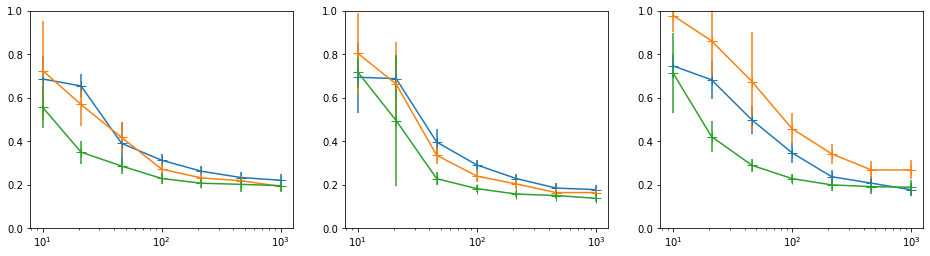

In [136]:
colors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(1, 3, figsize=(16.0, 4.0))
for i, solver_mode in enumerate(solver_modes):
    for j, mode in enumerate(modes):
        if solver_mode == "nef" and mode == "non_lindep_cosine":
            continue
        for k, q in enumerate(qs):
            if q != 7:
                continue
            Es = errs_delays[i, j, k, :, :, 0, :, :]
            Es = np.nanmean(Es, axis=-1) # Compute the mean delay error
            Es = Es.reshape(len(neurons), -1)
            E25 = np.nanpercentile(Es, 25, axis=1)
            E50 = np.nanpercentile(Es, 50, axis=1)
            E75 = np.nanpercentile(Es, 75, axis=1)
            color = colors[i]
            axs[j].errorbar(neurons, E50, (E75 - E50), (E50 - E25), '-+', markersize=10, color=colors[i])        #axs[j].legend()
        axs[j].set_ylim(0, 1)
        axs[j].set_xscale('log')

In [106]:
solver_modes

['nef', 'biased_xs', 'unbiased_xs']

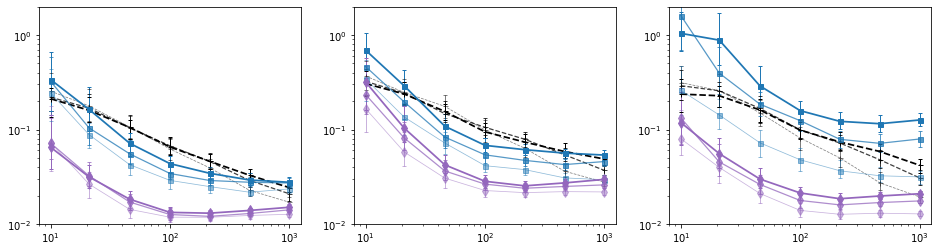

In [130]:
style = {
    "nef": {
        "color": "k",
        "linestyle": "--",
        "marker": '+',
        "markersize": 5,
    },
    "biased_xs": {
        "color": "tab:blue",
        "linestyle": '-',
        "marker": 's',
        "markersize": 5,
    },
    "unbiased_xs": {
        "color": "tab:purple",
        "linestyle": '-',
        "marker": 'd',
        "markersize": 7,
    }
}

colors = ['tab:blue', 'tab:orange', 'tab:green']
fig, axs = plt.subplots(1, 3, figsize=(16.0, 4.0))
for i, solver_mode in enumerate(solver_modes):
    for j, mode in enumerate(modes):
        if solver_mode == "nef" and mode == "non_lindep_cosine":
            continue
        for k, q in enumerate(qs):
            Es = errs_tuning[i, j, k, :, :, 0, :]
            Es = Es.reshape(len(neurons), -1)
            E25 = np.nanpercentile(Es, 25, axis=1)
            E50 = np.nanpercentile(Es, 50, axis=1)
            E75 = np.nanpercentile(Es, 75, axis=1)
            color = colors[i]
            axs[j].errorbar(neurons, E50, ((E50 - E25), (E75 - E50)), capsize=2, **style[solver_mode], alpha=(0.5 + 0.25 * k), linewidth=(0.75 + 0.5 * k), elinewidth=1.0)
        axs[j].set_ylim(1e-2, 2)
        axs[j].set_xscale('log')
        axs[j].set_yscale('log')